In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import fully_connected

###Reading the Dataset

In [18]:
mnist = input_data.read_data_sets("/MNIST_data/", one_hot=True)

Extracting /MNIST_data/train-images-idx3-ubyte.gz
Extracting /MNIST_data/train-labels-idx1-ubyte.gz
Extracting /MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /MNIST_data/t10k-labels-idx1-ubyte.gz


###Initializing kernels and biases

In [0]:
initializer = tf.contrib.layers.variance_scaling_initializer()
#kernels
ew1 = tf.Variable(initializer([3,3,1,32]), dtype = tf.float32)
ew2 = tf.Variable(initializer([3,3,32,64]), dtype = tf.float32)
ew3 = tf.Variable(initializer([3,3,64,128]), dtype = tf.float32)

dw1 = tf.Variable(initializer([3,3,128,64]), dtype = tf.float32)
dw2 = tf.Variable(initializer([3,3,64,32]), dtype = tf.float32)
dw3 = tf.Variable(initializer([3,3,32,16]), dtype = tf.float32)

dw = tf.Variable(initializer([3,3,16,1]), dtype = tf.float32)

#biases
eb1 = tf.Variable(tf.zeros(32))
eb2 = tf.Variable(tf.zeros(64))
eb3 = tf.Variable(tf.zeros(128))

db1 = tf.Variable(tf.zeros(64))
db2 = tf.Variable(tf.zeros(32))
db3 = tf.Variable(tf.zeros(16))

db = tf.Variable(tf.zeros(1))

###Defining the Model


In [0]:
x = tf.placeholder(tf.float32, shape = [None, 784])
X = tf.reshape(x, [-1, 28, 28, 1])
y = tf.placeholder(tf.float32, shape = [None, 784])
Y = tf.reshape(y, [-1, 28, 28, 1])

strides = 1 #convolution
k = 2 #pooling

#model

conv1 = tf.nn.conv2d(X, ew1, strides = [1, strides, strides, 1], padding = 'SAME')
conv1 = tf.nn.bias_add(conv1, eb1)
conv1 = tf.nn.leaky_relu(conv1)
conv1 = tf.nn.max_pool(conv1, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding= 'SAME')

conv2 = tf.nn.conv2d(conv1, ew2, strides = [1, strides, strides, 1], padding = 'SAME')
conv2 = tf.nn.bias_add(conv2, eb2)
conv2 = tf.nn.leaky_relu(conv2)
conv2 = tf.nn.max_pool(conv2, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding= 'SAME')

conv3 = tf.nn.conv2d(conv2, ew3, strides = [1, strides, strides, 1], padding = 'SAME')
conv3 = tf.nn.bias_add(conv3, eb3)
conv3 = tf.nn.leaky_relu(conv3)
encoder = tf.nn.max_pool(conv3, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding= 'SAME')
#print(encoder.get_shape())

upsample1 = tf.image.resize_images(encoder, size = (7,7), method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
conv4 = tf.nn.conv2d(upsample1, dw1, strides = [1, strides, strides, 1], padding = 'SAME')
conv4 = tf.nn.bias_add(conv4, db1)
conv4 = tf.nn.leaky_relu(conv4)

upsample2 = tf.image.resize_images(conv4, size = (14,14), method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
conv5 = tf.nn.conv2d(upsample2, dw2, strides = [1, strides, strides, 1], padding = 'SAME')
conv5 = tf.nn.bias_add(conv5, db2)
conv5 = tf.nn.leaky_relu(conv5)

upsample3 = tf.image.resize_images(conv5, size = (28,28), method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
conv6 = tf.nn.conv2d(upsample3, dw3, strides = [1, strides, strides, 1], padding = 'SAME')
conv6 = tf.nn.bias_add(conv6, db3)
conv6 = tf.nn.leaky_relu(conv6)

decoder = tf.nn.conv2d(conv6, dw, strides = [1, strides, strides, 1], padding = 'SAME')
decoder = tf.nn.bias_add(decoder, db)
decoder = tf.nn.sigmoid(decoder)

###Defining Loss function and Optimizer

In [0]:
with tf.device('/gpu:0'): 
    lr = 0.0001
    #loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = x, logits = oned))
    loss = tf.reduce_mean(tf.square(decoder - Y))
    optimizer = tf.train.AdamOptimizer(lr)
    train = optimizer.minimize(loss)
    init = tf.global_variables_initializer()

##Run the Model

epoch 1 loss 0.044419851154088974
epoch 2 loss 0.03582439944148064
epoch 3 loss 0.030512191355228424
epoch 4 loss 0.027293534949421883
epoch 5 loss 0.027106216177344322
epoch 6 loss 0.0233294814825058
epoch 7 loss 0.024739479646086693
epoch 8 loss 0.023825304582715034
epoch 9 loss 0.022367699071764946
epoch 10 loss 0.02194182761013508
epoch 11 loss 0.020648164674639702
epoch 12 loss 0.02050621435046196
epoch 13 loss 0.020333871245384216
epoch 14 loss 0.01914030872285366
epoch 15 loss 0.01867540366947651
epoch 16 loss 0.01949993148446083
epoch 17 loss 0.019112640991806984
epoch 18 loss 0.0189772117882967
epoch 19 loss 0.017940590158104897
epoch 20 loss 0.01885383203625679
epoch 21 loss 0.01815318875014782
epoch 22 loss 0.01670677214860916
epoch 23 loss 0.01792907528579235
epoch 24 loss 0.017059821635484695
epoch 25 loss 0.016798248514533043
epoch 26 loss 0.01789703406393528
epoch 27 loss 0.01858496479690075
epoch 28 loss 0.016445524990558624
epoch 29 loss 0.016646752133965492
epoch 30 l

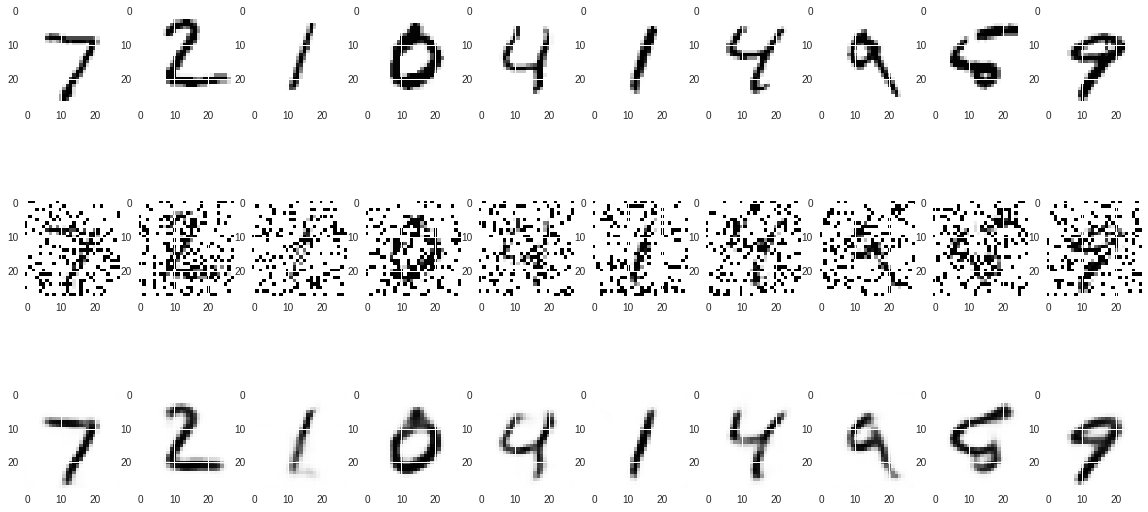

In [26]:
num_epoch = 50
batch_size = 150
num_test_images = 10

#Noise Properties

row,col = 28,28
s_vs_p = .5
amount = .6


with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epoch):
        num_batches = mnist.train.num_examples // batch_size
        
        for i in range(num_batches):
            X_batch,_ = mnist.train.next_batch(batch_size)
            noised_batch = []
            
            
            #Creating the Noised Batch, introducing Salt and Pepper noise
            for i in X_batch:
                out = np.copy(i)
                # Salt mode
                num_salt = np.ceil(amount * i.size * s_vs_p)
                coords = [np.random.randint(0, j - 1, int(num_salt))
                      for j in i.shape]
                out[coords] = 1

                # Pepper mode
                num_pepper = np.ceil(amount* i.size * (1. - s_vs_p))
                coords = [np.random.randint(0, j - 1, int(num_pepper))
                      for j in i.shape]
                out[coords] = 0
                noised_batch.append(out)
            
            
            sess.run(train, feed_dict={x:noised_batch, y:X_batch})
        
        train_loss = loss.eval(feed_dict = {x:noised_batch, y:X_batch})
        print("epoch {} loss {}".format(epoch+1, train_loss))
    
    noise_test = []
      
    #Creating Noised Test Images
    for i in mnist.test.images:
        out = np.copy(i)
        # Salt mode
        num_salt = np.ceil(amount * i.size * s_vs_p)
        coords = [np.random.randint(0, j - 1, int(num_salt))
              for j in i.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* i.size * (1. - s_vs_p))
        coords = [np.random.randint(0, j - 1, int(num_pepper))
              for j in i.shape]
        out[coords] = 0
        noise_test.append(out)
    
    
    results = decoder.eval(feed_dict={x:noise_test,y:mnist.test.images[:num_test_images]})
    f,a=plt.subplots(3,10,figsize=(20,10))
    for i in range(num_test_images):
        a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        a[1][i].imshow(np.reshape(noise_test[i],(28,28)))
        a[2][i].imshow(np.reshape(results[i],(28,28)))